In [1]:
import matplotlib.axes
import pandas
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.signal import savgol_filter

In [2]:
tagArray1 = [
    "E280689400005013F1509918", "E280689400005013F150B118", "E280689400005013F150A518",
    "E280689400004013F1509D18", "E280689400004013F150B518", "E280689400005013F150A918",
    "E280689400005013F1509518", "E280689400004013F150AD18", "E280689400004013F150A118"
]

tagArray2 = [
    "E280689400005013F150D118", "E280689400004013F151C517", "E280689400005013F150C518",
    "E280689400004013F150CD18", "E280689400004013F150B918", "E280689400004013F150C118",
    "E280689400004013F150D518", "E280689400005013F150BD18", "E280689400005013F150C918"
]

In [3]:
dataPath = r"C:\Users\HHao\OneDrive\学习\研究生\小论文\实验数据\2023-11-04_13-20-41.csv"
data = pd.read_csv(dataPath, header=[2])
columns = []
for columnName in data.columns:
    name: str = columnName.strip()
    name = name.strip("// ")
    columns.append(name)
data.columns = columns
data = data.drop(["TID", "Frequency", "Hostname", "DopplerFrequency"], axis=1)

In [4]:
tagArray1Data = data[(data["EPC"].isin(tagArray1)) & (data["Antenna"] == 1)]
group = tagArray1Data.groupby("EPC")
groupList = list(group)
tag1: pandas.DataFrame = group.get_group(tagArray1[0])
tag1.index = [datetime.fromisoformat(time) for time in tag1["Timestamp"]]

In [12]:
tag1

,Timestamp,EPC,Antenna,RSSI,PhaseAngle
2023-11-04 13:29:46.557128+08:00,2023-11-04T13:29:46.5571280+08:00,E280689400005013F1509918,1,-33.0,1.171961
2023-11-04 13:29:46.570079+08:00,2023-11-04T13:29:46.5700790+08:00,E280689400005013F1509918,1,-33.5,1.227185
2023-11-04 13:29:46.687691+08:00,2023-11-04T13:29:46.6876910+08:00,E280689400005013F1509918,1,-33.5,1.129010
2023-11-04 13:29:46.780096+08:00,2023-11-04T13:29:46.7800960+08:00,E280689400005013F1509918,1,-32.0,5.289166
2023-11-04 13:29:46.811284+08:00,2023-11-04T13:29:46.8112840+08:00,E280689400005013F1509918,1,-32.0,5.497787
...,...,...,...,...,...
2023-11-04 13:29:51.974111+08:00,2023-11-04T13:29:51.9741110+08:00,E280689400005013F1509918,1,-34.0,5.780040
2023-11-04 13:29:52.048902+08:00,2023-11-04T13:29:52.0489020+08:00,E280689400005013F1509918,1,-34.0,5.681865
2023-11-04 13:29:52.061788+08:00,2023-11-04T13:29:52.0617880+08:00,E280689400005013F1509918,1,-33.5,5.761632
2023-11-04 13:29:52.142282+08:00,2023-11-04T13:29:52.1422820+08:00,E280689400005013F1509918,1,-34.0,5.706409


In [30]:
resampledTag1 = tag1["RSSI"].resample("50ms").mean().interpolate("linear")
resampledTag1

2023-11-04 13:29:46.550000+08:00   -33.250
2023-11-04 13:29:46.600000+08:00   -33.375
2023-11-04 13:29:46.650000+08:00   -33.500
2023-11-04 13:29:46.700000+08:00   -32.750
2023-11-04 13:29:46.750000+08:00   -32.000
                                     ...  
2023-11-04 13:29:51.950000+08:00   -34.000
2023-11-04 13:29:52+08:00          -34.000
2023-11-04 13:29:52.050000+08:00   -33.500
2023-11-04 13:29:52.100000+08:00   -34.000
2023-11-04 13:29:52.150000+08:00   -34.000
Freq: 50L, Name: RSSI, Length: 113, dtype: float64

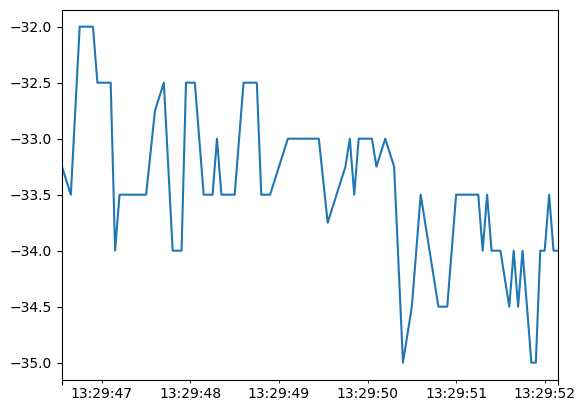

In [31]:
resampledTag1.plot()
plt.show()

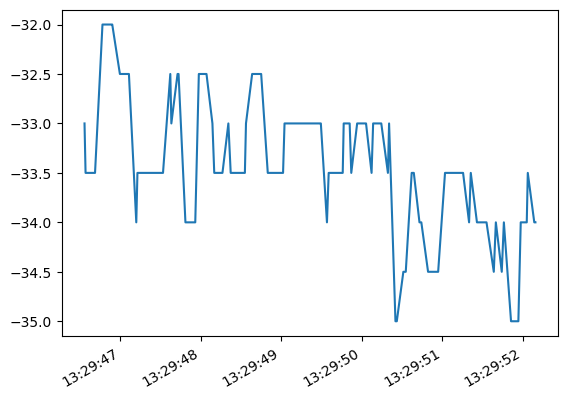

In [33]:
tag1["RSSI"].plot()
plt.show()